<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Machine-Learning/blob/Homework-4/Homework_4_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW4_Q1**

**In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with 80% and 20% split between training and evaluation (test) sets.**

**Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).**

**1 - Identify the optimum number of K, principal components that achieve the highest classification accuracy.**

**2 - Plot your classification accuracy, precision, and recall over a different number of Ks.**

**3 - Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for di**fferent kernels.

**4 - Compare your results against the logistic regression that you have done in homework 3.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [ ]:
def model_training(X_train, y_train, X_test, y_test, cv=None, penalty='none', c=0.1, solver='lbfgs'):
    #classifier = SVC(kernel='rbf', C=1E3)
    #classifier = SVC(kernel='poly', C=1E3)
    classifier = SVC(kernel='linear', C=1E3)
    #classifier = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=0)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, Y_pred)
    return cnf_matrix, Y_pred

def get_confusion_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))
    print("Precision:",metrics.precision_score(y_test, Y_pred))
    print("Recall:",metrics.recall_score(y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(y_test, Y_pred))
    return acc*100.0

# Breast Cancer dataset read

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred)
    rec = metrics.recall_score(y_test, Y_pred)
    fscore = metrics.f1_score(y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))
    print("Precision:",metrics.precision_score(y_test, Y_pred))
    print("Recall:",metrics.recall_score(y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(y_test, Y_pred))
    return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]


def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = LogisticRegression(random_state=9)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list

def SVC_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = SVC(kernel='rbf', C=1E3)
        #classifier = SVC(kernel='poly', C=1E3)
        classifier = SVC(kernel='linear', C=1E3)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list
    cnf_matrix = confusion_matrix(y_test, Y_pred)
    return cnf_matrix, Y_pred


def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title('Plotting classification accuracy, precision, recall and F1-score over a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)

sc_X = StandardScaler()
X = sc_X.fit_transform(breast_input)

(569, 30)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
k_list, acc_list, precision_list, recall_list, f1score_list  = SVC_model_training_pca(X, Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1-Score: 0.9487179487179487
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9382716049382716
Recall: 0.9743589743589743
F1-Score: 0.9559748427672956
K = 3
Accuracy: 0.956140350877193
Precision: 0.9620253164556962
Recall: 0.9743589743589743
F1-Score: 0.9681528662420382
K = 4
Accuracy: 0.9824561403508771
Precision: 0.975
Recall: 1.0
F1-Score: 0.9873417721518987
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9743589743589743
Recall: 0.9743589743589743
F1-Score: 0.9743589743589743
K = 6
Accuracy: 0.9824561403508771
Precision: 0.9871794871794872
Recall: 0.9871794871794872
F1-Score: 0.9871794871794872
K = 7
Accuracy: 0.9824561403508771
Precision: 0.9871794871794872
Recall: 0.9871794871794872
F1-Score: 0.9871794871794872
K = 8
Accuracy: 0.9736842105263158
Precision: 0.987012987012987
Recall: 0.9743589743589743
F1-Score: 0.9806451612903225
K = 9
Accuracy: 0.9824561403508771
Precision: 0.98717948717948

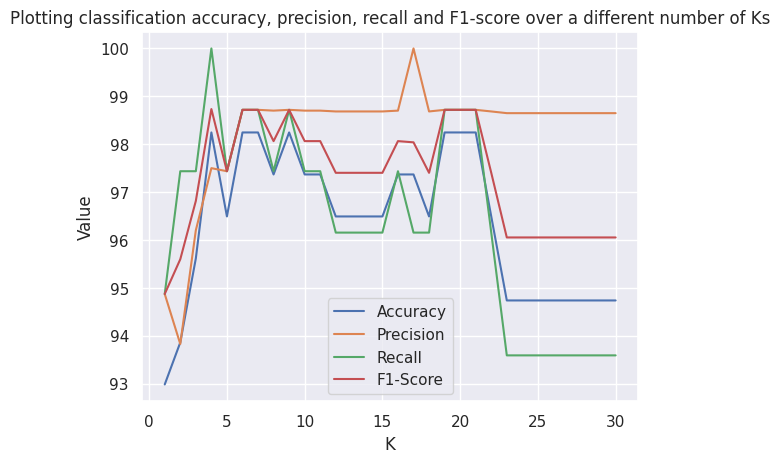

In [ ]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

In [ ]:
cnf_matrix, Y_pred = model_training(X_train, y_train, X_test, y_test)

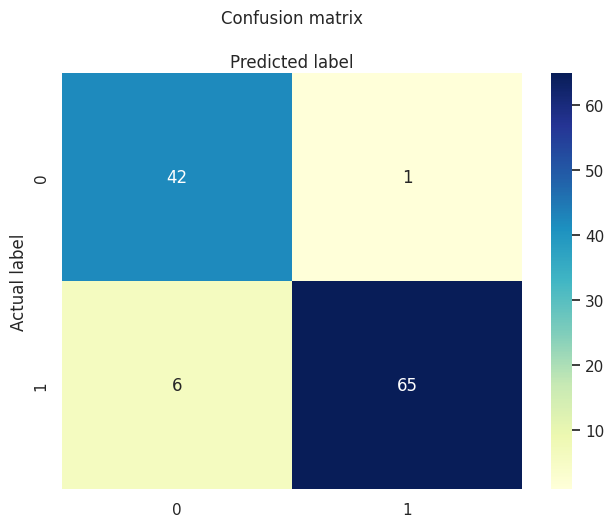

In [ ]:
get_confusion_matrix(cnf_matrix)